# Milestone 1

## Primary Focus and Background Information

My primary focus is investigating the role that L1 expression plays in neurodegenerative diseases and cancers. Transposable elements are sequences of DNA that can change their position witin the genome cause mutations to occur. They have played a significant role in the evolution of genomes and can influence the expression and functions of genes. L1 is a type of autonomous transposable element, which means it can move by itself within the genome. L1s make up about 17% of the human genome and while most of them are no longer active, there are still some that can copy and insert themselves into new loci, which can potentially disrupt genes and contribute to diseases like cancer or Alzheimer's.

## Potential Datasets

I have a list of sequencing datasets that I am considering for analysis. The first one comes from a paper titled "Untangling the brain's neuroinflammatory and neurodegenerative transcriptional responses" from Srinivasan et al (2016). This study analyzed transcriptional changes in different cells within the hemicortex due to neurodegenerative diseases such as Alzheimer's. With this sequencing data I hope to answer how L1 expression varies among neurons, astrocytes, and microglia in the hemicortex between neurodegenerative and healthy conditions and whether there is a correlation between Tnfr1 signaling and the regulation of L1 expression in astrocytes within the hemicortex. L1 elements are known to influence genomic stability and have been implicated in neurological disorders in other studies, by examining their expression across multiple cell types, I hope to find insights into their specific roles in neurodegeneration. This paper identified Tnfr1 as an essential signal for astrocytic responses. I hope to investigate the potential influence that it could have over L1 expression and reveal mechanism by which inflammatory signaling pathwats impact transposable element activity in astrocytes. The second dataset comes from "Both fallopian tube and ovarian surface epithelium are cells-of-origin for high-grade serous ovarian carcinoma" by Zhang et al (2019). This study address the cell-of-origin debate for high grade serous ovarian carcinoma (HGSOC) by comparing fallopian tube epithelial tissue (FTE) and ovarian surface epithelial tissue (OSE) in genetically engineered mice. This dataset can reveal how L1 expression differs between tumors originating in FTE and OSE in HGSOC models and if L1 expression influences the metastatic potential and chemosensitivity of HGSOC tumors derived from these tissues. Understanding differential L1 activity based on the cell-of-orgin can reveal the distinct molecular pathways involved in tumorigenesis and potentially identify treatment targets. Knowing that L1 elements can potentially affect gene regulation and genomic integrity, their expression might correlate with aggressive behavior and treatment responses of tumors of different origins. The third dataset comes from "Comparative analysis of syngeneic mouse models of high-grade serous ovarian cancer" by Cook et al (2023). This study performs a comparative transcriptomic analysis of various HGSOC models, including cell lines and tumor samples. It highlights the differences in signaling pathways, metabolic profiles, and microenvironmental interactions among these. The sequencing data from this paper can reveal the pattern of L1 expression across different HGSOC models and how it associates with different signaling pathways and metabolic processes. It can also reveal how variability in L1 expression correlates with stromal content and microenvironmental factors in the tumor samples. Investigating the relationship between L1 activity and signaling pathways can reveal how transposable elements contribute to the oncogeneic behavior and metabolic adaptations of cancer cells. The microenvironment in tumors plays a critical role in how cancer progresses. Exploring L1 expression in relation to stromal components can reveal how transposable elements interact with non-malignant cells.

## Extraction, Transform, and Load (ETL)

For this demonstration, I am using the differential expression data from the **Cook et al. (2023)** paper, which is available on the Gene Expression Omnibus (GEO) under accession number **GSE242835**.

1. **Data Extraction**:  
   The RNA-seq data was downloaded in **.fastq** format, containing raw sequencing reads from multiple samples.

2. **Data Transformation**:  
   - Reads were aligned to the **mm39** mouse reference genome using **STAR**, generating **BAM** files.
   - Transposable element (TE) expression was quantified using **TECount**, resulting in a counts dataset in **.cntTable** format.
   - **DESeq2** was used to create a normalized counts matrix and differential expression results, output as CSV files.

3. **Data Loading**:  
   The counts and differential expression datasets were loaded into Python using **pandas** for further analysis.

In [2]:
import pandas as pd
counts_df = pd.read_csv("counts_data.csv", index_col=0)
results_df = pd.read_csv("results_data.csv", index_col=0)

In [3]:
# Filter rows where 'LINE' is present in the index for both counts and results DataFrames
line_counts_df = counts_df[counts_df.index.str.contains('LINE', case=False)]
line_results_df = results_df[results_df.index.str.contains('LINE', case=False)]

# Display the reduced DataFrames
print(line_counts_df.head())
print(line_results_df.head())

                     SRR25999149  SRR25999151  SRR25999150  SRR25999148  \
AmnL2-1:L2:LINE              163           89           70          124   
CR1-12_AMi:CR1:LINE            1            0            0            0   
CR1-13_AMi:CR1:LINE            0            0            0            0   
CR1-16_AMi:CR1:LINE            7            2            8            0   
CR1-1_Amn:CR1:LINE             2            0            1            1   

                     SRR25999124  SRR25999147  SRR25999121  SRR25999122  \
AmnL2-1:L2:LINE              127          136          117           93   
CR1-12_AMi:CR1:LINE            0            0            1            0   
CR1-13_AMi:CR1:LINE            0            0            0            0   
CR1-16_AMi:CR1:LINE            6            2            2            0   
CR1-1_Amn:CR1:LINE             0            1            1            0   

                     SRR25999123  SRR25999118  ...  SRR25999093  SRR25999094  \
AmnL2-1:L2:LINE   

In [4]:
#Check the dytpes in my dataframes
print(line_counts_df.dtypes)
print(line_results_df.dtypes)

SRR25999149    int64
SRR25999151    int64
SRR25999150    int64
SRR25999148    int64
SRR25999124    int64
               ...  
SRR25999097    int64
SRR25999125    int64
SRR25999128    int64
SRR25999126    int64
SRR25999127    int64
Length: 102, dtype: object
baseMean          float64
log2FoldChange    float64
lfcSE             float64
stat              float64
pvalue            float64
padj              float64
dtype: object


In [5]:
#Fill in any potential NaNs with 0s
line_counts_df = line_counts_df.fillna(0)
line_results_df = line_results_df.fillna(0)

In [6]:
#Check that the differential expression data is tidy
line_results_df.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
AmnL2-1:L2:LINE,135.155826,0.009691,0.296848,0.032646,0.973957,0.982378
CR1-12_AMi:CR1:LINE,0.319448,-0.440265,7.335988,-0.060014,0.952144,0.000000
CR1-13_AMi:CR1:LINE,0.090787,0.487132,11.997281,0.040604,0.967612,0.000000
CR1-16_AMi:CR1:LINE,4.559727,-4.425395,1.471649,-3.007099,0.002638,0.008996
CR1-1_Amn:CR1:LINE,0.521322,-1.741648,2.583516,-0.674139,0.500223,0.000000


1. - Each variable such as **baseMean**, **log2FoldChange**, and **pvalue** are in their own colum
2. - Each row represents an observation for a specific LINE element
2. - Each observational unit forms a table. The table is exclusive to LINE expression.

## Exploratory Data Analysis (EDA)
Log2FoldChange is a good variable to explore because it quantifies the changes in expression levels between the experimental and control samples.
Log2 transformation makes the data symmetric. A log2fc of 1 means the expression doubled, -1 means it was halved, and 0 indicates no change.
It also compresses large ranges which makes it better to visualize and interpret as the scale is considerably more manageable.
With log2 fold change, we can identfiy which elements are upregulated and which are downregulated.

In [7]:
import matplotlib.pyplot as plt

In [8]:
# Calculate summary statistics for log2FoldChange
log2fc_stats = line_results_df['log2FoldChange'].describe()
print("Log2 Fold Change Summary Statistics:")
print(log2fc_stats)

Log2 Fold Change Summary Statistics:
count    192.000000
mean      -0.225322
std        1.024583
min       -4.425395
25%       -0.679824
50%       -0.160082
75%        0.322308
max        2.934013
Name: log2FoldChange, dtype: float64


In [9]:
# Find the top 5 L1 elements with the largest positive log2 fold changes
top_5_positive = line_results_df.nlargest(5, 'log2FoldChange')
print("\nTop 5 L1 Elements with Highest Positive Log2 Fold Change:")
print(top_5_positive[['log2FoldChange']])


Top 5 L1 Elements with Highest Positive Log2 Fold Change:
                              log2FoldChange
L1M3f:L1:LINE                       2.934013
Penelope1_Vert:Penelope:LINE        1.989399
L1_Mur2:L1:LINE                     1.876861
MARE6:L1-Tx1:LINE                   1.874589
L1Lx_IV:L1:LINE                     1.806322


In [10]:
# Find the top 5 L1 elements with the largest negative log2 fold changes
top_5_negative = line_results_df.nsmallest(5, 'log2FoldChange')
print("\nTop 5 L1 Elements with Highest Negative Log2 Fold Change:")
print(top_5_negative[['log2FoldChange']])


Top 5 L1 Elements with Highest Negative Log2 Fold Change:
                     log2FoldChange
CR1-16_AMi:CR1:LINE       -4.425395
L1_Mus3:L1:LINE           -4.055679
X7B_LINE:CR1:LINE         -3.979945
L1MCb:L1:LINE             -3.289859
L1M3d:L1:LINE             -2.751148


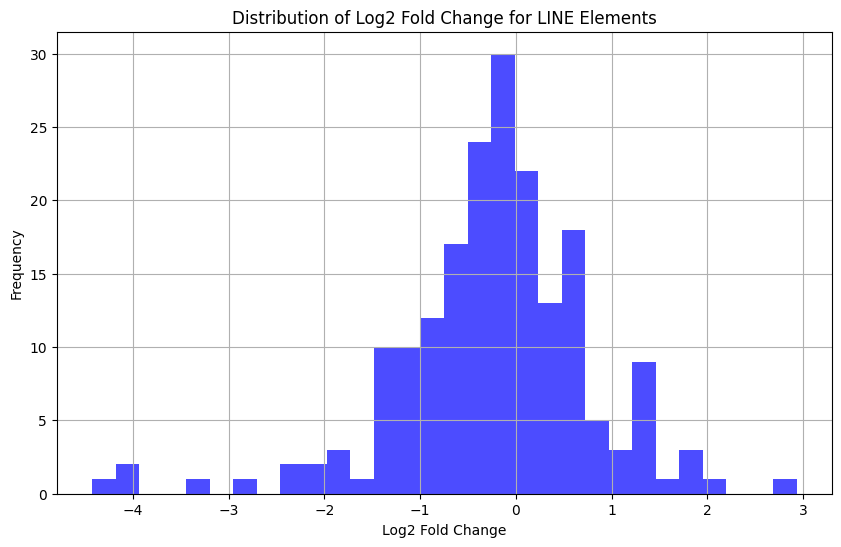

In [11]:
# Plot histogram of log2FoldChange to show distribution
plt.figure(figsize=(10, 6))
plt.hist(line_results_df['log2FoldChange'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Log2 Fold Change for LINE Elements')
plt.xlabel('Log2 Fold Change')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

This distribution shows that there is little to no change for a majority of the elements in the data set. There is a slight left skew and indicating that there is a subset of elements with a more extreme negative change. There are subsets of elements in this dataset that have more change than the majority and further analysis and exploration of these elements can be performed.

## Relevant Links
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6879755/
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4844685/
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10643551/
- The above links provide reference to the GEO accession in the data availabilty statement
- https://www.ncbi.nlm.nih.gov/geo/
- https://esdartez.github.io/